In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [109]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")
df2.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

In [111]:
prof = df1.profile_report()
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  7.17it/s]


In [112]:
df1.describe()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,policy_annual_premium,umbrella_limit,insured_zip,witnesses,auto_year,_c39,total_claim_amount
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,700.000000,700.000000,0.0,700.000000
mean,209.528571,39.417143,25777.571429,-27061.000000,551898.977143,1142.142857,11.747143,1.827143,1.001429,1256.950357,1.092857e+06,500211.260000,1.442857,2004.984286,NaN,71900.933214
std,114.746174,9.170472,28239.300780,27874.242557,260076.772911,617.005999,6.987445,1.014970,0.819119,249.616802,2.289793e+06,71731.677629,1.132631,6.013198,NaN,34915.974923
min,0.000000,19.000000,0.000000,-111100.000000,100804.000000,500.000000,0.000000,1.000000,0.000000,433.330000,0.000000e+00,430104.000000,0.000000,1995.000000,NaN,133.330000
25%,123.000000,32.000000,0.000000,-51825.000000,337547.250000,500.000000,6.000000,1.000000,0.000000,1084.702500,0.000000e+00,446952.000000,0.000000,2000.000000,NaN,58933.330000
50%,209.000000,39.000000,5000.000000,-27450.000000,547773.000000,1000.000000,12.000000,1.000000,1.000000,1256.340000,0.000000e+00,465565.000000,1.000000,2005.000000,NaN,77733.330000
75%,283.000000,45.000000,52200.000000,0.000000,775554.500000,2000.000000,17.250000,3.000000,2.000000,1423.890000,0.000000e+00,603417.500000,2.000000,2010.000000,NaN,95503.332500
max,479.000000,64.000000,98800.000000,0.000000,998865.000000,2000.000000,23.000000,4.000000,2.000000,2047.590000,1.000000e+07,620869.000000,3.000000,2015.000000,NaN,153226.670000


In [137]:
train_data = df1.drop(["_c39", "Customer_ID"], axis="columns")
test_data = df2.drop(["_c39", "Customer_ID"], axis="columns")
Customer_ID_test = df2["Customer_ID"]

In [115]:
data.isnull().sum()

Customer_ID                    0
months_as_customer             0
age                            0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
witnesses 

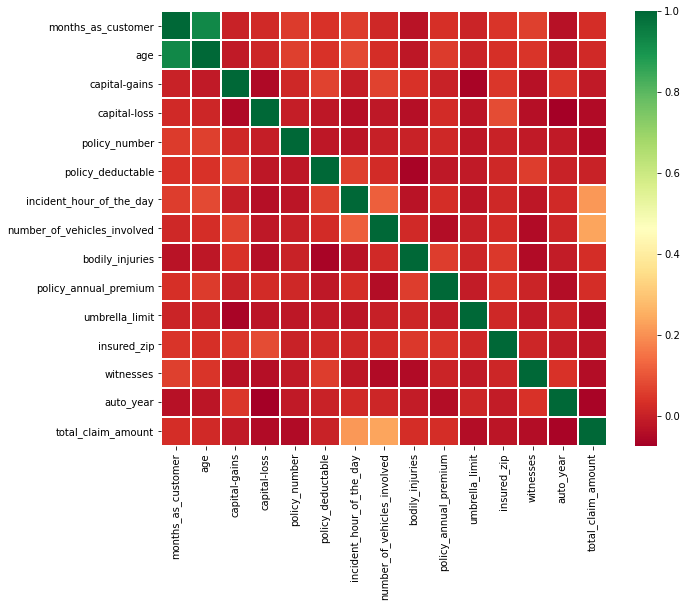

In [116]:
sns.heatmap(data.corr(),cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<AxesSubplot:xlabel='count', ylabel='insured_occupation'>

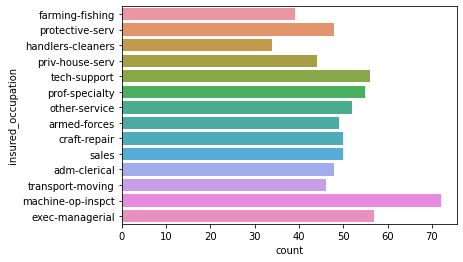

In [117]:
sns.countplot(y = "insured_occupation", data= data)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

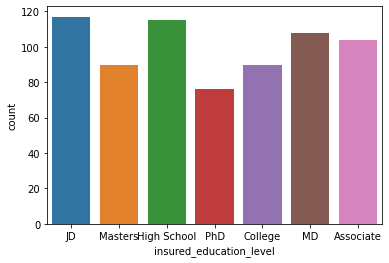

In [118]:
sns.countplot(x = "insured_education_level", data= data)

In [138]:
train_data.columns

Index(['months_as_customer', 'age', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       'total_claim_amount'],
      dtype='object')

In [120]:
from categorical_encode.categorical import categorical

In [139]:
X_train = train_data.drop(["total_claim_amount"], axis=1)
y_train = train_data["total_claim_amount"]

X_train.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year
0,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,743092,...,?,Trivial Damage,Police,NC,Arlington,2,YES,Mercedes,E400,2013
1,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,492224,...,Rear Collision,Total Loss,Fire,NY,Columbus,2,NO,Dodge,Neon,2006
2,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,996253,...,Front Collision,Major Damage,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004
3,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,355085,...,Front Collision,Major Damage,Other,WV,Columbus,0,?,Toyota,Corolla,2012
4,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,192524,...,Front Collision,Total Loss,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003


In [145]:
X_train_cate = categorical(X_train)
X_test_cate = categorical(test_data)
X_train_cate.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2
2,3,3,2,1,3,3,2,2,3,3,...,3,3,3,3,3,2,3,3,3,3
3,4,4,2,3,3,4,3,2,2,4,...,3,3,3,3,2,3,3,4,4,4
4,5,5,2,4,4,5,2,3,2,5,...,3,2,1,3,4,1,1,3,5,5


In [146]:
X_test_cate.head()

,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,policy_number,...,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,2,2,1,2,2,2,2,2,1,2,...,2,1,1,2,2,1,2,2,2,2
2,3,3,1,3,3,3,2,3,2,3,...,1,2,2,1,2,1,1,3,3,3
3,4,4,2,4,4,4,3,4,3,4,...,2,1,3,3,3,2,3,4,4,4
4,5,5,1,2,5,5,1,3,4,5,...,3,3,3,3,4,2,2,5,5,5


In [122]:
from sklearn.linear_model import LinearRegression

In [147]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [149]:
submission_test_pred = lin_reg.predict(X_test_cate)

In [159]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


In [160]:
xgb.fit(X_train, y_train)

[12:35:43] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [161]:
submission_test_pred_2 = xgb.predict(X_test_cate)

In [162]:
id_col = Customer_ID_test
submission_df_2 = pd.DataFrame({
                  "Customer_ID": id_col, 
                  "total_claim_amount": submission_test_pred_2})
submission_df_2.head()

,Customer_ID,total_claim_amount
0,Customer_521,8560.104492
1,Customer_737,27213.367188
2,Customer_740,52038.292969
3,Customer_660,32412.179688
4,Customer_411,57143.519531


In [163]:
submission_df_2.to_csv('submission_2.csv', index=False)